In [1]:
!pip3 install catboost


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [119]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import hamming_loss

In [3]:
data = pd.read_csv("Maritime Accidents Reports - Overall Data.csv")

In [4]:
data

,Summary,Safety Issues,Location,Title,Date Occurred,Unnamed: 5,Decision Events,Skill Based Events,Perception Events,Routine Violation,...,Adverse Physiological,Medical / Mental,Individual Perception,Inadequate Supervision,Failure to Correct a Known Problem,Planned Inappropriate Operations,Supervisory Violations,Organizational Culture / Climate,Organizational Processes,Resource Management
0,"At 1400 on 5 July 2022, the UK registered roll...",routinely passing too close to land\n\nfatigue...,"east coast of Swona Island, Pentland Firth, Sc...",Grounding of roll-on/roll-off passenger ferry ...,5 July 2022,NaN,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
1,"On 2 October 2022, the mono-hulled offshore po...",Steering control was lost when a drive shaft f...,Loss of control of powerboat Awesome with loss...,"near Little Thatch Island, British Virgin Islands",22 October 2022,NaN,1,0,0,1,...,0,1,0,0,1,1,0,0,0,0
2,"On 7 October 2022, a deckhand from the UK regi...",The unwritten on board process for shooting ne...,approximately 150 nautical miles west of Ireland,Fall overboard from fishing vessel Eder Sands ...,7 October 2022,NaN,0,0,0,1,...,0,0,0,0,0,1,0,0,1,1
3,"On the morning of 22 August 2020, the commerci...",The skipper did not see the buoy in sufficient...,"Southampton Water, England",Heavy contact between the high-speed passenger...,22 August 2020,NaN,1,0,1,0,...,1,1,0,0,0,1,1,1,1,1
4,"On 15 November 2019, an apprentice engineer di...",the fire-extinguishing aerosol was hazardous t...,"Alongside North Pier at Newlyn Harbour, Cornwa...",Accidental discharge of condensed aerosol fire...,15 November 2019,NaN,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,About 0048 Alaska Standard Time on February 16...,​​The probable cause of the grounding of the S...,AK,Grounding of Commercial Fishing Vessel Savanna...,2/15/2015,NaN,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
705,"About 1510 local time on January 22, 2015, the...",​​The probable cause of the flooding and event...,"Oahu, HI",Marine Accident Brief: Sinking of Towing Vesse...,1/22/2015,NaN,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
706,"​​About 1430 on September 23, 2014 t​he fishin...",The probable cause of the loss of the fishing ...,"Southwest Pass, LA",Capsizing and Sinking of the Fishing Vessel Ch...,9/23/2014,NaN,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
707,"​​On March 12, 2013, at 1745 local time, the t...",​​We determined that the probable cause of the...,"Bayou Perot, LA",Fire on Board Towing Vessel Shanon E. Settoon,3/12/2013,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
data = data.drop(["Unnamed: 5"], axis=1)

In [6]:
data

,Summary,Safety Issues,Location,Title,Date Occurred,Decision Events,Skill Based Events,Perception Events,Routine Violation,Physical Environment,...,Adverse Physiological,Medical / Mental,Individual Perception,Inadequate Supervision,Failure to Correct a Known Problem,Planned Inappropriate Operations,Supervisory Violations,Organizational Culture / Climate,Organizational Processes,Resource Management
0,"At 1400 on 5 July 2022, the UK registered roll...",routinely passing too close to land\n\nfatigue...,"east coast of Swona Island, Pentland Firth, Sc...",Grounding of roll-on/roll-off passenger ferry ...,5 July 2022,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
1,"On 2 October 2022, the mono-hulled offshore po...",Steering control was lost when a drive shaft f...,Loss of control of powerboat Awesome with loss...,"near Little Thatch Island, British Virgin Islands",22 October 2022,1,0,0,1,0,...,0,1,0,0,1,1,0,0,0,0
2,"On 7 October 2022, a deckhand from the UK regi...",The unwritten on board process for shooting ne...,approximately 150 nautical miles west of Ireland,Fall overboard from fishing vessel Eder Sands ...,7 October 2022,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
3,"On the morning of 22 August 2020, the commerci...",The skipper did not see the buoy in sufficient...,"Southampton Water, England",Heavy contact between the high-speed passenger...,22 August 2020,1,0,1,0,0,...,1,1,0,0,0,1,1,1,1,1
4,"On 15 November 2019, an apprentice engineer di...",the fire-extinguishing aerosol was hazardous t...,"Alongside North Pier at Newlyn Harbour, Cornwa...",Accidental discharge of condensed aerosol fire...,15 November 2019,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,About 0048 Alaska Standard Time on February 16...,​​The probable cause of the grounding of the S...,AK,Grounding of Commercial Fishing Vessel Savanna...,2/15/2015,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,0
705,"About 1510 local time on January 22, 2015, the...",​​The probable cause of the flooding and event...,"Oahu, HI",Marine Accident Brief: Sinking of Towing Vesse...,1/22/2015,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
706,"​​About 1430 on September 23, 2014 t​he fishin...",The probable cause of the loss of the fishing ...,"Southwest Pass, LA",Capsizing and Sinking of the Fishing Vessel Ch...,9/23/2014,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
707,"​​On March 12, 2013, at 1745 local time, the t...",​​We determined that the probable cause of the...,"Bayou Perot, LA",Fire on Board Towing Vessel Shanon E. Settoon,3/12/2013,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Summary                             709 non-null    object
 1   Safety Issues                       709 non-null    object
 2   Location                            708 non-null    object
 3   Title                               709 non-null    object
 4   Date Occurred                       709 non-null    object
 5   Decision Events                     709 non-null    int64 
 6   Skill Based Events                  709 non-null    int64 
 7   Perception Events                   709 non-null    int64 
 8   Routine Violation                   709 non-null    int64 
 9   Physical Environment                709 non-null    int64 
 10  Technical Environment               709 non-null    int64 
 11  Space Environment                   709 non-null    int64 

In [8]:
data = data.sample(frac=1, ignore_index=True)

In [9]:
data

,Summary,Safety Issues,Location,Title,Date Occurred,Decision Events,Skill Based Events,Perception Events,Routine Violation,Physical Environment,...,Adverse Physiological,Medical / Mental,Individual Perception,Inadequate Supervision,Failure to Correct a Known Problem,Planned Inappropriate Operations,Supervisory Violations,Organizational Culture / Climate,Organizational Processes,Resource Management
0,A shore worker was fatally injured when he bec...,the deceased used an unapproved means of acces...,"Ilfracombe Harbour, England",Accident to shore worker while disembarking pa...,3 August 2015,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,Kuzma Minin grounded after dragging its anchor...,the financial situation of the Murmansk Shippi...,"Falmouth Bay, England",Grounding of bulk carrier Kuzma Minin,18 December 2018,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,"At 2100 BST on 9 August 2006, the Antigua and ...",the master was aware that an appropriate chart...,"Mostyn Bank, Wales",Dragging anchor and grounding of general cargo...,10 August 2006,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,"On June 22, 2020, about 0230 local time, the d...",The probable cause of the collapse of containe...,"Hilo, HI",Container Damage and Loss aboard Deck Cargo Ba...,6/22/2020,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
4,"The yacht Ouzo sailed from Bembridge, Isle of ...",Ouzo was not seen or otherwise detected by the...,"South of the Isle of Wight, England",Sinking of sailing yacht Ouzo after encounter ...,20 August 2006,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,"About 1725 on August 24, a fire was detected i...",The probable cause of the fire aboard fishing ...,"Newburyport, MA",Fire and Subsequent Sinking of Commercial Fish...,8/24/2018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
705,"On 3 June 1993 at 0543, the British Trent and ...",failure to comply with the International Regul...,"Near Akkaert Bank, Belgium",Collision between oil tanker British Trent and...,3 June 1993,1,1,0,1,1,...,1,0,0,0,0,1,0,0,1,0
706,"On 10 June 2000, the Mariama K (a 29.76m long ...",Mariama K’s bilge pumps were defective on depa...,"Douarnenez, France",Carbon monoxide poisoning on stern trawler Mar...,10 June 2000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
707,"At 0453 UTC on 9 April 2011, the Gibraltar reg...",Philipp’s OOW had not properly assessed the ri...,6nm south of the Isle of Man,Collision between container vessel Philipp and...,9 April 2011,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data_labels = data.drop(['Summary', 'Safety Issues', 'Location', 'Title', 'Date Occurred'], axis=1)
counts = []
categories = list(data_labels.columns.values)
l = len(data)
not_req = []
for i in categories:
    cnt = data_labels[i].sum()
    # print(type(cnt))
    if (cnt < l * 0.11):
      not_req.append(i)
    counts.append((i, cnt))
data_stats = pd.DataFrame(counts, columns=['category', 'number_of_reports'])
data_stats

,category,number_of_reports
0,Decision Events,249
1,Skill Based Events,161
2,Perception Events,29
3,Routine Violation,116
4,Physical Environment,134
5,Technical Environment,337
6,Space Environment,75
7,Communications,144
8,Self Imposed Stress,29
9,Awareness Cognitive Factors,121


In [11]:
data = data.drop(not_req, axis=1)

Text(0.5, 0, 'category')

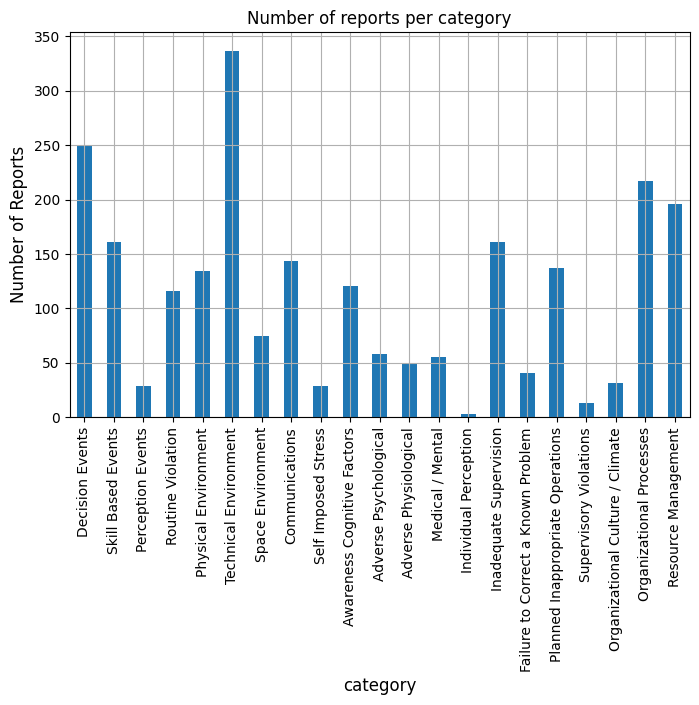

In [12]:
data_stats.plot(x='category', y='number_of_reports', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Number of reports per category")
plt.ylabel('Number of Reports', fontsize=12)
plt.xlabel('category', fontsize=12)

In [13]:
issues = data["Safety Issues"].tolist()

(array([ 1.,  4., 20., 42., 66., 71., 82., 86., 69., 33., 60., 31., 27.,
        23., 19., 23.,  9., 10.,  8.,  9.,  5.,  3.,  3.,  2.,  0.,  0.,
         3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
         900.,  950., 1000., 1050., 1100., 1150., 1200., 1250., 1300.,
        1350., 1400., 1450., 1500., 1550., 1600., 1650., 1700., 1750.,
        1800., 1850., 1900., 1950., 2000., 2050., 2100., 2150., 2200.,
        2250., 2300., 2350., 2400., 2450., 2500., 2550., 2600., 2650.,
        2700.

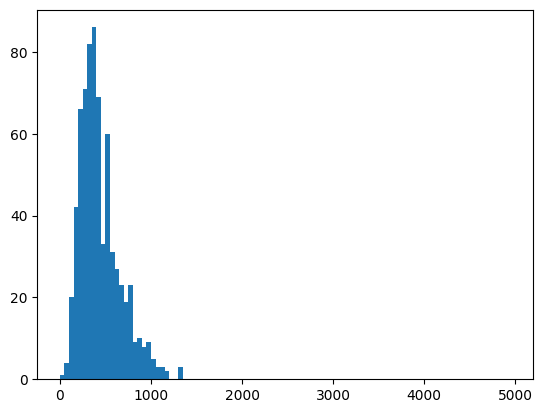

In [14]:
lens = []
for issue in issues:
  lens.append(len(issue))
plt.hist(lens, bins=np.arange(0, 5000, 50))

In [15]:
def clean_text(text):
  text = text.lower()
  text = re.sub('\n', '', text)
  return text

In [16]:
data["Summary"] = data["Summary"].apply(clean_text)
data["Safety Issues"] = data["Safety Issues"].apply(clean_text)

In [17]:
data["Overall Info"] = "Summary: " + data["Summary"] + " Safety Issues: " + data["Safety Issues"]

In [18]:
data

,Summary,Safety Issues,Location,Title,Date Occurred,Decision Events,Skill Based Events,Routine Violation,Physical Environment,Technical Environment,Communications,Awareness Cognitive Factors,Inadequate Supervision,Planned Inappropriate Operations,Organizational Processes,Resource Management,Overall Info
0,a shore worker was fatally injured when he bec...,the deceased used an unapproved means of acces...,"Ilfracombe Harbour, England",Accident to shore worker while disembarking pa...,3 August 2015,0,1,0,0,0,0,0,1,0,1,0,Summary: a shore worker was fatally injured wh...
1,kuzma minin grounded after dragging its anchor...,the financial situation of the murmansk shippi...,"Falmouth Bay, England",Grounding of bulk carrier Kuzma Minin,18 December 2018,0,0,0,1,0,0,0,0,0,0,1,Summary: kuzma minin grounded after dragging i...
2,"at 2100 bst on 9 august 2006, the antigua and ...",the master was aware that an appropriate chart...,"Mostyn Bank, Wales",Dragging anchor and grounding of general cargo...,10 August 2006,0,1,0,0,0,1,0,0,1,1,0,"Summary: at 2100 bst on 9 august 2006, the ant..."
3,"on june 22, 2020, about 0230 local time, the d...",the probable cause of the collapse of containe...,"Hilo, HI",Container Damage and Loss aboard Deck Cargo Ba...,6/22/2020,0,0,0,0,0,0,0,0,0,1,1,"Summary: on june 22, 2020, about 0230 local ti..."
4,"the yacht ouzo sailed from bembridge, isle of ...",ouzo was not seen or otherwise detected by the...,"South of the Isle of Wight, England",Sinking of sailing yacht Ouzo after encounter ...,20 August 2006,1,0,0,0,0,0,0,0,0,1,0,"Summary: the yacht ouzo sailed from bembridge,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,"about 1725 on august 24, a fire was detected i...",the probable cause of the fire aboard fishing ...,"Newburyport, MA",Fire and Subsequent Sinking of Commercial Fish...,8/24/2018,1,0,0,0,1,0,0,0,0,0,1,"Summary: about 1725 on august 24, a fire was d..."
705,"on 3 june 1993 at 0543, the british trent and ...",failure to comply with the international regul...,"Near Akkaert Bank, Belgium",Collision between oil tanker British Trent and...,3 June 1993,1,1,1,1,0,0,1,0,1,1,0,"Summary: on 3 june 1993 at 0543, the british t..."
706,"on 10 june 2000, the mariama k (a 29.76m long ...",mariama k’s bilge pumps were defective on depa...,"Douarnenez, France",Carbon monoxide poisoning on stern trawler Mar...,10 June 2000,0,0,0,0,1,0,0,0,0,0,1,"Summary: on 10 june 2000, the mariama k (a 29...."
707,"at 0453 utc on 9 april 2011, the gibraltar reg...",philipp’s oow had not properly assessed the ri...,6nm south of the Isle of Man,Collision between container vessel Philipp and...,9 April 2011,1,0,1,0,0,1,0,0,0,0,0,"Summary: at 0453 utc on 9 april 2011, the gibr..."


(array([ 0.,  0.,  0.,  0.,  1.,  2.,  4.,  5., 11., 13., 15., 10., 27.,
        35., 57., 44., 48., 55., 55., 49., 38., 42., 25., 28., 19., 15.,
        14., 13., 11., 11., 10., 12.,  9.,  7.,  2.,  1.,  6.,  2.,  3.,
         2.,  0.,  2.,  2.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
         900.,  950., 1000., 1050., 1100., 1150., 1200., 1250., 1300.,
        1350., 1400., 1450., 1500., 1550., 1600., 1650., 1700., 1750.,
        1800., 1850., 1900., 1950., 2000., 2050., 2100., 2150., 2200.,
        2250., 2300., 2350., 2400., 2450., 2500., 2550., 2600., 2650.,
        2700.

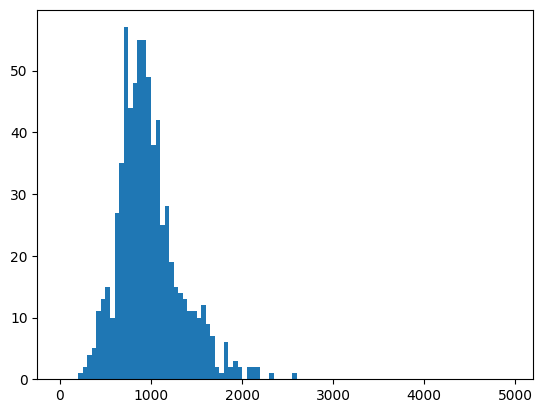

In [19]:
issues = data["Overall Info"].tolist()
lens = []
for issue in issues:
  lens.append(len(issue))
plt.hist(lens, bins=np.arange(0, 5000, 50))

In [20]:
data.to_csv("data_preprocess.csv")

In [21]:
x = data["Overall Info"]
y = np.asarray(data[data.columns[5:16]])

In [22]:
y

array([[0, 1, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 1, 0]])

In [182]:
vectorizer = TfidfVectorizer(max_features=700)

In [183]:
vectorizer.fit(x)

TfidfVectorizer(max_features=700)

In [184]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=101)

In [185]:
x_train = vectorizer.transform(x_train)
x_test = vectorizer.transform(x_test)

In [186]:
model = OneVsRestClassifier(CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, verbose=False))

In [187]:
model.fit(x_train, y_train)

OneVsRestClassifier(estimator=<catboost.core.CatBoostClassifier object at 0x2842f5e80>)

In [188]:
y_pred = model.predict(x_test)

In [189]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.42      0.52        36
           1       0.80      0.13      0.23        30
           2       0.50      0.04      0.08        24
           3       0.67      0.27      0.39        22
           4       0.68      0.53      0.60        53
           5       0.86      0.29      0.43        21
           6       0.67      0.07      0.13        28
           7       0.55      0.25      0.34        24
           8       0.50      0.05      0.09        21
           9       0.76      0.35      0.48        37
          10       0.33      0.04      0.07        27

   micro avg       0.68      0.26      0.37       323
   macro avg       0.64      0.22      0.30       323
weighted avg       0.65      0.26      0.34       323
 samples avg       0.53      0.28      0.35       323



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [190]:
loss = hamming_loss(y_test, y_pred)

In [191]:
loss

0.23704333050127444

In [192]:
model1 = OneVsRestClassifier(LinearSVC())

In [193]:
model1.fit(x_train, y_train)

OneVsRestClassifier(estimator=LinearSVC())

In [194]:
y_pred1 = model1.predict(x_test)

In [195]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.51      0.53      0.52        36
           1       0.75      0.30      0.43        30
           2       0.56      0.21      0.30        24
           3       0.67      0.27      0.39        22
           4       0.80      0.66      0.72        53
           5       0.78      0.33      0.47        21
           6       1.00      0.18      0.30        28
           7       0.65      0.46      0.54        24
           8       0.57      0.19      0.29        21
           9       0.55      0.49      0.51        37
          10       0.53      0.33      0.41        27

   micro avg       0.64      0.40      0.49       323
   macro avg       0.67      0.36      0.44       323
weighted avg       0.67      0.40      0.47       323
 samples avg       0.61      0.43      0.47       323



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [196]:
loss1 = hamming_loss(y_test, y_pred1)

In [197]:
loss1

0.2259983007646559

In [198]:
model2 = OneVsRestClassifier(LogisticRegression())

In [199]:
model2.fit(x_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [200]:
y_pred2 = model2.predict(x_test)

In [201]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.51      0.53      0.52        36
           1       0.75      0.30      0.43        30
           2       0.56      0.21      0.30        24
           3       0.67      0.27      0.39        22
           4       0.80      0.66      0.72        53
           5       0.78      0.33      0.47        21
           6       1.00      0.18      0.30        28
           7       0.65      0.46      0.54        24
           8       0.57      0.19      0.29        21
           9       0.55      0.49      0.51        37
          10       0.53      0.33      0.41        27

   micro avg       0.64      0.40      0.49       323
   macro avg       0.67      0.36      0.44       323
weighted avg       0.67      0.40      0.47       323
 samples avg       0.61      0.43      0.47       323



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [202]:
loss2 = hamming_loss(y_test, y_pred2)

In [203]:
loss2

0.24553950722175022

In [204]:
model3 = OneVsRestClassifier(DecisionTreeClassifier())

In [205]:
model3.fit(x_train, y_train)

OneVsRestClassifier(estimator=DecisionTreeClassifier())

In [206]:
y_pred3 = model3.predict(x_test)

In [207]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.54      0.56      0.55        36
           1       0.42      0.37      0.39        30
           2       0.33      0.25      0.29        24
           3       0.45      0.45      0.45        22
           4       0.52      0.49      0.50        53
           5       0.38      0.43      0.40        21
           6       0.54      0.25      0.34        28
           7       0.55      0.67      0.60        24
           8       0.18      0.19      0.19        21
           9       0.50      0.51      0.51        37
          10       0.32      0.33      0.33        27

   micro avg       0.45      0.42      0.43       323
   macro avg       0.43      0.41      0.41       323
weighted avg       0.45      0.42      0.43       323
 samples avg       0.45      0.45      0.42       323



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [208]:
loss3 = hamming_loss(y_test, y_pred3)

In [209]:
loss3

0.30246389124893797

In [210]:
model4 = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))

In [211]:
model4.fit(x_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(random_state=42))

In [212]:
y_pred4 = model4.predict(x_test)

In [213]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.87      0.36      0.51        36
           1       1.00      0.07      0.12        30
           2       0.75      0.12      0.21        24
           3       1.00      0.27      0.43        22
           4       0.69      0.51      0.59        53
           5       1.00      0.05      0.09        21
           6       0.00      0.00      0.00        28
           7       1.00      0.08      0.15        24
           8       0.00      0.00      0.00        21
           9       0.78      0.19      0.30        37
          10       1.00      0.04      0.07        27

   micro avg       0.78      0.19      0.31       323
   macro avg       0.74      0.15      0.23       323
weighted avg       0.74      0.19      0.27       323
 samples avg       0.47      0.23      0.29       323



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [214]:
loss4 = hamming_loss(y_test, y_pred4)

In [215]:
loss4

0.23619371282922685